
<img src="https://afar.brightspotcdn.com/dims4/default/98e744f/2147483647/strip/true/crop/1357x720+41+0/resize/1440x764!/quality/90/?url=https%3A%2F%2Fk3-prod-afar-media.s3.us-west-2.amazonaws.com%2Fbrightspot%2Fd8%2F10%2Fa894f5ec4828bfd1a1998353c974%2Ftravelguide-california-lala-miklos-unsplash.jpg" width=500px>

# California Housing

We will use the California Housing Dataset for these exercises. This dataset contains information regarding housing in California districts, including median income, house age, and average rooms.

In [1]:
import numpy as np
import pandas as pd

california_path = "https://raw.githubusercontent.com/Armagaan/noc26_cs86/refs/heads/main/data/california_housing.csv"
df = pd.read_csv(california_path)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Central Tendency Analysis
- Load the California Housing dataset.
- Calculate the **Mean**, **Median**, and **Mode** for the `MedInc` (Median Income) column.
- Based on the difference between the mean and median, what can you infer about the distribution's skewness?

In [2]:
mean_inc = df['MedInc'].mean()
median_inc = df['MedInc'].median()
mode_inc = df['MedInc'].mode()[0] # mode() returns a Series

print(f"MedInc - Mean: {mean_inc:.2f}, Median: {median_inc:.2f}, Mode: {mode_inc:.2f}")
# Inference: Since Mean > Median, the distribution is likely Positively (Right) Skewed.

MedInc - Mean: 3.87, Median: 3.53, Mode: 3.12


## 2. Measuring Dispersion

- Focus on the `HouseAge` column. Calculate its **Range**, **Variance**, and **Standard Deviation**.
- If you were to compare the "spread" of `HouseAge` across two different districts, why might you prefer the standard deviation over the variance?

In [3]:
house_age = df['HouseAge']
age_range = house_age.max() - house_age.min()
age_var = house_age.var()
age_std = house_age.std()

print(f"HouseAge - Range: {age_range}, Variance: {age_var:.2f}, Std Dev: {age_std:.2f}")
# Standard deviation is preferred for comparison because it is in the same units as the original data.

HouseAge - Range: 51.0, Variance: 158.40, Std Dev: 12.59


## 3. Relative Dispersion (Coefficient of Variation)
- Calculate the **Coefficient of Variation (CV)** for both `MedInc` and `Population`.
- Which variable shows higher relative variability?
- Why is CV more useful than standard deviation when comparing these two specific variables?
- What will you do when the mean is 0?
- Consider two gaussian distributions $N(\mu=1, \sigma=10)$ and $N(\mu=10, \sigma=10)$. Clearly they have different CV's. What does this imply?

In [4]:
std_inc = df['MedInc'].std()
std_pop = df['Population'].std()

cv_inc = (std_inc / df['MedInc'].mean()) * 100
cv_pop = (std_pop / df['Population'].mean()) * 100

print(f"Std MedInc:  {std_inc:.2f}, Std Population:  {std_pop:.2f}")
print(f"CV MedInc: {cv_inc:.2f}%, CV Population: {cv_pop:.2f}%")

# CV is better for comparing variables with different units (Income vs. Number of People).
# It normalizes by the mean's value.

Std MedInc:  1.90, Std Population:  1132.46
CV MedInc: 49.08%, CV Population: 79.44%


> _Why is CV more useful than standard deviation when comparing these two specific variables?_

CV standardizes variability by the mean, so it lets you compare relative dispersion between variables that differ in scale or units. Standard deviation alone reflects absolute spread and can be misleading when means are very different.

> _What will you do when the mean is 0?_

CV should not be used. It is intended for data on a ratio scale, where zero is not meaningful (zero means “nothing”). So when the mean is 0, the notion of relative variability breaks down and CV is undefined.

> _Consider two gaussian distributions $N(\mu=1, \sigma=10)$ and $N(\mu=10, \sigma=10)$. Clearly they have different CV's. What does this imply?_

The absolute variability is the same in both distributions. However, that same absolute variability is being measured relative to very different means. When the mean is small (e.g., 1), a change of a few units represents a large relative change: moving from 1 to 2 is a 100% increase. When the mean is large (e.g., 10), a change of the same absolute size is much smaller in relative terms. For example, moving from 10 to 12 is only a 20% increase. The CV captures exactly this idea: how large the variability is relative to the scale set by the mean. Hence, the distribution with mean 1 has a much larger CV than the one with mean 10.

## 4. Quartiles and IQR

- Find the **1st Quartile (Q1)**, **2nd Quartile (Q2/Median)**, and **3rd Quartile (Q3)** for the `AveRooms` (Average Rooms) column.
- Calculate the **Interquartile Range (IQR)** and explain why this measure is "robust" compared to the standard range.

In [5]:
q1, q2, q3 = np.percentile(df['AveRooms'], [25, 50, 75])
iqr = q3 - q1

print(f"AveRooms - Q1: {q1:.2f}, Q2: {q2:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")

# Explanation:
# IQR is more robust because it only depends the middle 50% of the data.
# It ignores extreme values, while std uses all observations
# Hence, outliers can heavily distort std.


AveRooms - Q1: 4.44, Q2: 5.23, Q3: 6.05, IQR: 1.61


## 5. Chebyshev’s Theorem Verification

According to Chebyshev’s Theorem, at least 75% of data should fall within 2 standard deviations of the mean for *any* distribution.

For the `MedHouseVal` column:
- Calculate the mean ($\mu$) and standard deviation ($\sigma$).
- Find the percentage of data points that lie within the interval .
- Verify if the theorem holds true.

In [6]:
mu = df['MedHouseVal'].mean()
sigma = df['MedHouseVal'].std()
lower, upper = mu - 2 * sigma, mu + 2 * sigma

# Option 1 (general)
mask = (df['MedHouseVal'] >= lower) & (df['MedHouseVal'] <= upper)

# Option 2 (better in this case)
mask2 = df['MedHouseVal'].between(lower, upper)

within_2std = df[mask2]
percentage = (len(within_2std) / len(df)) * 100

print(f"Percentage within 2 Std Dev: {percentage:.2f}% (Chebyshev requires > 75%)")

Percentage within 2 Std Dev: 93.30% (Chebyshev requires > 75%)


## 6. Skewness and Shape

- Calculate the **Skewness** coefficient for the `Population` column using `scipy.stats`.
- Based on the result, classify the distribution as **Positively Skewed**, **Negatively Skewed**, or **Symmetric**.

In [7]:
from scipy import stats

pop_skew = stats.skew(df['Population'])
print(f"Population Skewness: {pop_skew:.2f}")
# A high positive value indicates a heavy right tail (Positively Skewed).

Population Skewness: 4.94


## 7. Visualizing Skewness with Histogram

Visualize the skewness of the `Population` column using a histogram.

In [8]:
import matplotlib.pyplot as plt

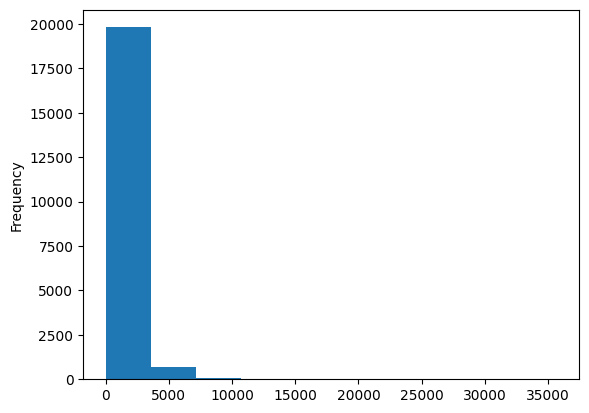

In [9]:
df["Population"].plot(
    kind="hist",
)
plt.show()

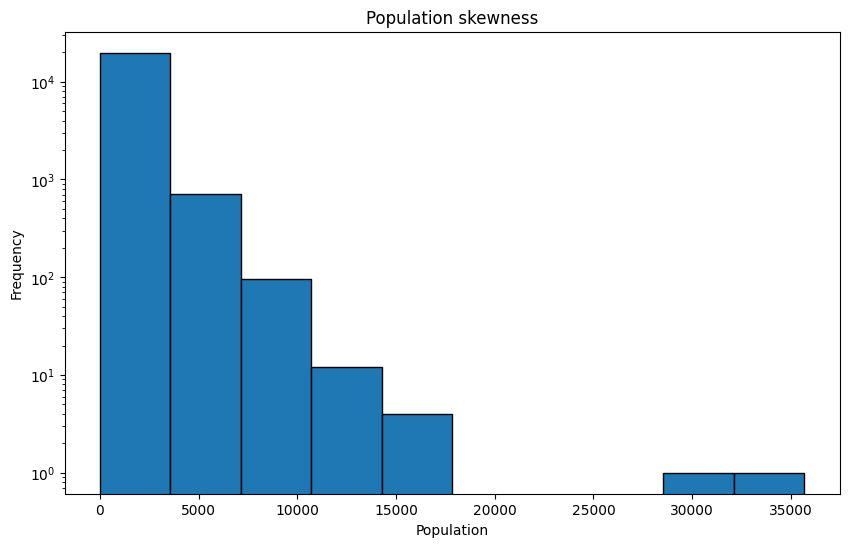

In [10]:
# log scale
df["Population"].plot(
    kind="hist",
    xlabel="Population",
    title="Population skewness",
    figsize=(10, 6),
    edgecolor="black",
)
plt.yscale("log")

## 8. Identifying Outliers with Boxplots
Generate a **Box and Whisker Plot** for the `MedInc` column.

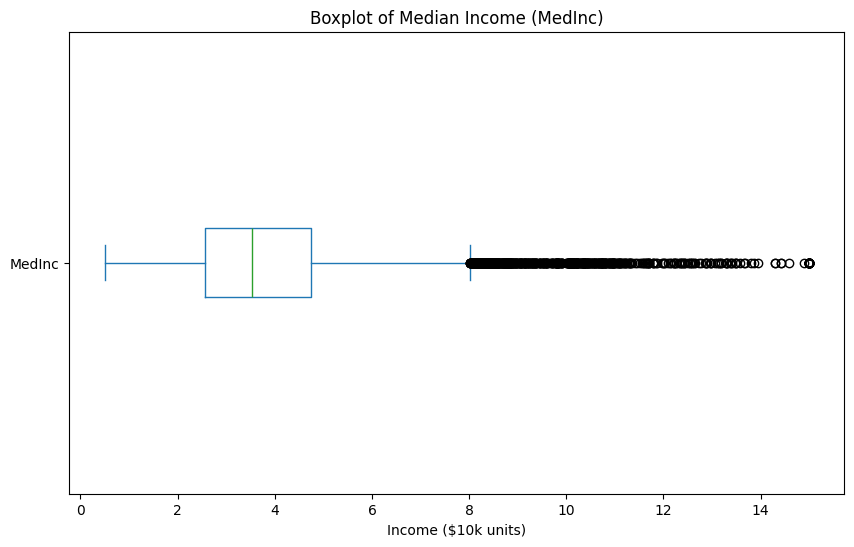

In [11]:
# iqr -> outliers
df["MedInc"].plot(
    kind="box",
    vert=False,
    title="Boxplot of Median Income (MedInc)",
    xlabel="Income ($10k units)",
    figsize=(10, 6)
)
plt.show()